<a href="https://colab.research.google.com/github/aureliodeboa/Deep-Learning/blob/main/Primeiro_Projeto_Deep_Learnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Treinamento de Rede Neural

Este é um trabalho da disciplina de Deep Learng, ministrada pelo projessor Rosalvo

E foi feito pelos alunos:
Aurelio Jose
Joao Paulo
Manoel Ferreira


Primeiro Realizamos diversas pesquisas para fundamentar as arquiteturas utilizadas e foram elas :
##Arquitetura 1
*Camadas ocultas: 3*

Fórmula para calcular quantidade de neurônios:

 Nz = (Nx+ Ny) / 2

 Dropout: 0.4


##Arquitetura 2
*Camadas ocultas: 5*

Fórmula para calcular quantidade de neurônios:
Nz = ⅔ * Nx



Dropout: 0.4

##Arquitetura 3
*Camadas ocultas: 4*

Fórmula para calcular quantidade de neurônios:

 Nz = (⅔ * Nx) + Ny



Dropout: 0.4





In [ ]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam



import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [ ]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# What is the corresponding label in the training set?
y_train[333]

8

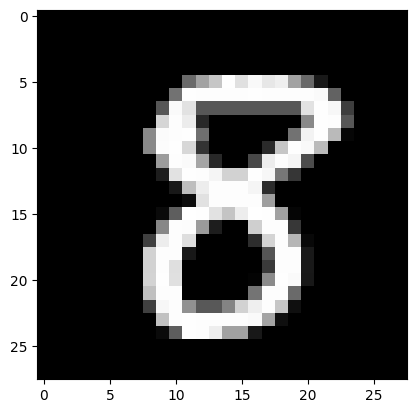

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

##Arquitetura 1
*Camadas ocultas: 3*

Fórmula para calcular quantidade de neurônios:

 Nz = (Nx+ Ny) / 2
 ou seja,
 Nz = (784 + 10)/2 => 369

Neurônios: Dropout: 0.4

In [ ]:
# We will build a model with one hidden layer of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(369, activation='relu', input_shape=(784,)))
#model_1.add(Dropout(0.4)) #probabilidade de um neoronio apagar
model_1.add(Dense(190, activation='relu'))
#model_1.add(Dropout(0.4)) #probabilidade de um neoronio apagar
model_1.add(Dense(100, activation='relu'))
#model_1.add(Dropout(0.4)) #probabilidade de um neoronio apagar
model_1.add(Dense(55, activation='relu'))
#model_1.add(Dropout(0.4)) #probabilidade de um neoronio apagar
model_1.add(Dense(33, activation='relu'))
#model_1.add(Dropout(0.4)) #probabilidade de um neoronio apagar
model_1.add(Dense(22, activation='relu'))
#model_1.add(Dropout(0.4)) #probabilidade de um neoronio apagar
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 369)               289665    
                                                                 
 dense_1 (Dense)             (None, 190)               70300     
                                                                 
 dense_2 (Dense)             (None, 100)               19100     
                                                                 
 dense_3 (Dense)             (None, 55)                5555      
                                                                 
 dense_4 (Dense)             (None, 33)                1848      
                                                                 
 dense_5 (Dense)             (None, 22)                748       
                                                                 
 dense_6 (Dense)             (None, 16)                3

In [ ]:
# Let's compile the model
learning_rate = .4
#model_1.compile(loss='categorical_crossentropy',
             # optimizer=RMSprop(lr=learning_rate),
              #metrics=['accuracy'])

model_1.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=learning_rate),  # Use o otimizador Adam aqui
               metrics=['accuracy'])

# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [ ]:
# And now let's fit.

batch_size = 32  # mini-batch with 128 examples
epochs = 20
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 30s 15ms/step - loss: 0.3106 - accuracy: 0.9103 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1120 - accuracy: 0.9683 - val_loss: 0.0976 - val_accuracy: 0.9723
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0828 - accuracy: 0.9768 - val_loss: 0.0884 - val_accuracy: 0.9751
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0647 - accuracy: 0.9814 - val_loss: 0.0826 - val_accuracy: 0.9778
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0517 - accuracy: 0.9855 - val_loss: 0.0871 - val_accuracy: 0.9768
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0483 - accuracy: 0.9863 - val_loss: 0.0840 - val_accuracy: 0.9785
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0353 - accuracy: 0.9900 - val_loss: 0.0805 - val_a

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
score2= model_1.evaluate(x_train,y_train,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('==================================')
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Test loss: 0.10542838275432587
Test accuracy: 0.9824000000953674
Train loss: 0.009929775260388851
Train accuracy: 0.9976000189781189


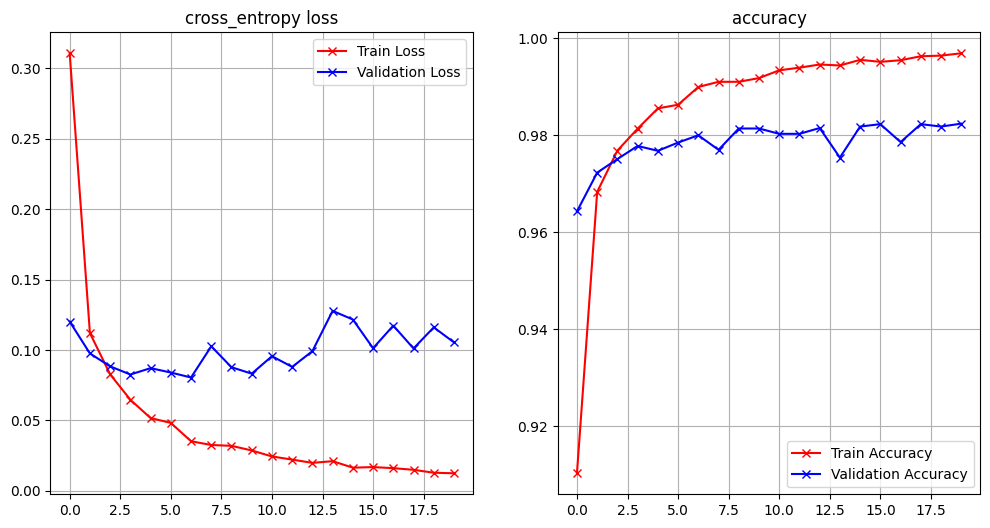

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

## Arquitetura 2

Camadas ocultas: 5

Fórmula para calcular quantidade de neurônios:

Nz = ⅔ * Nx

Neurônios: Dropout: 0.4


In [ ]:
# We will build a model with one hidden layer of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(522, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(384, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(170, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(113, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 522)               409770    
                                                                 
 dropout (Dropout)           (None, 522)               0         
                                                                 
 dense_9 (Dense)             (None, 384)               200832    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               98560     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 170)              

In [ ]:
# Let's compile the model
learning_rate = .4
model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [ ]:
# And now let's fit.

batch_size = 32  # mini-batch with 128 examples
epochs = 20
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 28s 14ms/step - loss: 0.5129 - accuracy: 0.8480 - val_loss: 0.1702 - val_accuracy: 0.9534
Epoch 2/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.9403

KeyboardInterrupt: ignored

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
score2 = model_1.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('------------------------------')
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])




In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

##Arquitetura 3

*Camadas ocultas: 4*

Fórmula para calcular quantidade de neurônios:

 Nz = (⅔ * Nx) + Ny

Neurônios: Dropout: 0.4


In [ ]:
# We will build a model with one hidden layer of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model = Sequential()
model.add(Dense(532, activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))  # Aumento da taxa de dropout para 0.4
model.add(Dense(364, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(178, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:
## Note that this model has a LOT of parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 532)               417620    
                                                                 
 dropout_5 (Dropout)         (None, 532)               0         
                                                                 
 dense_15 (Dense)            (None, 364)               194012    
                                                                 
 dropout_6 (Dropout)         (None, 364)               0         
                                                                 
 dense_16 (Dense)            (None, 252)               91980     
                                                                 
 dropout_7 (Dropout)         (None, 252)               0         
                                                                 
 dense_17 (Dense)            (None, 178)              

In [ ]:
# Let's compile the model
learning_rate = 0.4  # Redução da taxa de aprendizado
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),  # Substituição do otimizador RMSprop por Adam
              metrics=['accuracy'])

# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [ ]:
# And now let's fit.

batch_size = 32  # Mantendo o tamanho do lote em 32
epochs = 20
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3998 - accuracy: 0.8820 - val_loss: 0.1338 - val_accuracy: 0.9628
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2067 - accuracy: 0.9453 - val_loss: 0.1171 - val_accuracy: 0.9670
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1695 - accuracy: 0.9552 - val_loss: 0.0949 - val_accuracy: 0.9750
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1475 - accuracy: 0.9607 - val_loss: 0.1148 - val_accuracy: 0.9684
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1359 - accuracy: 0.9648 - val_loss: 0.0888 - val_accuracy: 0.9749
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1270 - accuracy: 0.9661 - val_loss: 0.0865 - val_accuracy: 0.9785
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1226 - accuracy: 0.9682 - val_loss: 0.0791 -

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model.evaluate(x_test, y_test, verbose=0)
score2 = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('====================================')
print('Train loss:', score2[0])
print('Train accuracy:', score2[1])

Test loss: 0.0899660661816597
Test accuracy: 0.9828000068664551
Train loss: 0.019959110766649246
Train accuracy: 0.9943333268165588


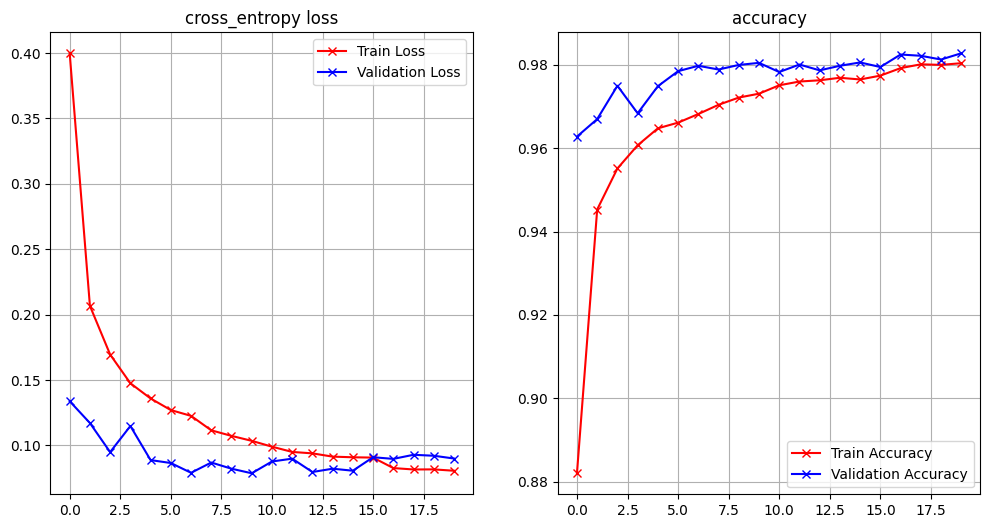

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)